In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
import string


pd.set_option('display.max_colwidth', None)

In [3]:
titles_df = pd.read_csv('../data/clean_titles.csv')

In [4]:
titles_df.head()

,uniq_id,Play,Occurences,Title
0,0,alls well that ends well,3,all's well that ends well
1,3,alls well that ends well,4,all's well
2,6,alls well that ends well,5,the devil drives
3,8,alls well that ends well,1,edge of hazard
4,13,alls well that ends well,3,a mingled yarn


In [5]:
titles_df['title_tokenized'] = titles_df['Title'].apply(lambda x: nltk.word_tokenize(x))

titles_df.head()

,uniq_id,Play,Occurences,Title,title_tokenized
0,0,alls well that ends well,3,all's well that ends well,"[all, 's, well, that, ends, well]"
1,3,alls well that ends well,4,all's well,"[all, 's, well]"
2,6,alls well that ends well,5,the devil drives,"[the, devil, drives]"
3,8,alls well that ends well,1,edge of hazard,"[edge, of, hazard]"
4,13,alls well that ends well,3,a mingled yarn,"[a, mingled, yarn]"


In [6]:
titles_df['title_tokenized_pos'] = titles_df['title_tokenized'].apply(lambda x: nltk.pos_tag(x))

titles_df.head()

,uniq_id,Play,Occurences,Title,title_tokenized,title_tokenized_pos
0,0,alls well that ends well,3,all's well that ends well,"[all, 's, well, that, ends, well]","[(all, DT), ('s, POS), (well, NN), (that, IN), (ends, VBZ), (well, RB)]"
1,3,alls well that ends well,4,all's well,"[all, 's, well]","[(all, DT), ('s, POS), (well, NN)]"
2,6,alls well that ends well,5,the devil drives,"[the, devil, drives]","[(the, DT), (devil, NN), (drives, NNS)]"
3,8,alls well that ends well,1,edge of hazard,"[edge, of, hazard]","[(edge, NN), (of, IN), (hazard, NN)]"
4,13,alls well that ends well,3,a mingled yarn,"[a, mingled, yarn]","[(a, DT), (mingled, VBN), (yarn, NN)]"


In [7]:
titles_df['title_pos'] = titles_df['title_tokenized_pos'].apply(lambda x: [i[1] for i in x])

titles_df.head()


,uniq_id,Play,Occurences,Title,title_tokenized,title_tokenized_pos,title_pos
0,0,alls well that ends well,3,all's well that ends well,"[all, 's, well, that, ends, well]","[(all, DT), ('s, POS), (well, NN), (that, IN), (ends, VBZ), (well, RB)]","[DT, POS, NN, IN, VBZ, RB]"
1,3,alls well that ends well,4,all's well,"[all, 's, well]","[(all, DT), ('s, POS), (well, NN)]","[DT, POS, NN]"
2,6,alls well that ends well,5,the devil drives,"[the, devil, drives]","[(the, DT), (devil, NN), (drives, NNS)]","[DT, NN, NNS]"
3,8,alls well that ends well,1,edge of hazard,"[edge, of, hazard]","[(edge, NN), (of, IN), (hazard, NN)]","[NN, IN, NN]"
4,13,alls well that ends well,3,a mingled yarn,"[a, mingled, yarn]","[(a, DT), (mingled, VBN), (yarn, NN)]","[DT, VBN, NN]"


There seems to be some nonstandard POS tags in the `title_pos` column. Further investgation indicates that these are due to punctuation. I am concerned that removal of punctuation will change the POS tag:  such as *father's* transforms from a nouns and a possessive to *fathers* which is plural.

However, the n-grammed Shakespearean text is without punctuation (CountVectorizer ignores punctuation), so I think that there will be an issue either way (since those n-grams will never have a possessive tag). I will a) strip the punctuation from the current pos_tag and b) recreate the pos_tag by stripping punctuation first.

In [8]:
tags = ['CC', 'CD',  'DT',  'EX',  'FW',  'IN',  'JJ',  'JJR',  'JJS',  'LS',  'MD',  'NN',  'NNS',  'NNP',  'NNPS',  'PDT',  'POS',  'PRP',  'PRP$',  'RB',  'RBR',  'RBS',  'RP',  'SYM',  'TO',  'UH',  'VB',  'VBD',  'VBG',  'VBN',  'VBP',  'VBZ',  'WDT',  'WP',  'WP$',  'WRB', 
]
for pos in titles_df.title_pos:
    count = sum([1 for tag in pos if tag not in tags])
    if count >= 1:
        print(pos)

['JJ', 'NN', ',', 'JJ', 'NN']
['DT', 'NN', 'NN', "''", 'DT', 'NN']
['CC', 'JJ', 'NNS', ':']
['NNS', ',', 'NNS', ',', 'NNS']
['NN', ',', 'NN', ',', 'CC', 'VB']
['NN', ',', 'NN']
['WP', 'NN', 'NN', 'VBZ', 'IN', '.']
['MD', 'JJ', 'NNS', 'VB', '.']
['RB', ',', 'JJ', ',', 'NN', 'CC', 'NN']
[':', 'CC', 'DT', 'PRP$', 'NNS']
['IN', ',', 'IN', ',', 'JJ', 'NN']
['IN', ',', 'JJ', 'NN']
['NN', 'IN', ',', 'NN', '.']
['NN', 'NN', '.']
['NN', ',', 'JJ', 'NN']
['NN', ',', 'WP', 'VBD']
['DT', 'JJ', ',', 'DT', 'NN', ',', 'CC', 'DT', 'NN']
['NN', ',', 'RB', 'POS', 'NN']
['DT', 'NN', ',', 'DT', 'NN']
['NN', ',', 'VB', 'RB', 'NN']
['NN', 'POS', 'NN', 'IN', 'NNS', ',', 'IN', 'NNS', ',', 'CC', 'NN']
['VB', 'PRP', ',', 'VB']
['VB', 'RB', ',', 'NN']
['NN', ',', 'JJ', 'NN', 'VBZ', 'NN']
['NNS', ',', 'NNS', ',', 'NNS']
['DT', 'JJ', 'NN', ',', 'DT', 'NN']
['TO', 'VB', 'CC', 'RB', 'TO', 'VB', ',', 'DT', 'VBZ', 'DT', 'NN']
['NN', 'IN', 'NN', '.']
['JJ', 'NN', ':', "''"]
['JJ', 'NN', ',', 'JJ', 'NNS']
['NNS', ',', '

In [9]:
new_pos = []

for pos in titles_df.title_pos:
    new_pos.append([tag for tag in pos if tag in tags])

titles_df['title_pos'] = new_pos

titles_df.tail()

,uniq_id,Play,Occurences,Title,title_tokenized,title_tokenized_pos,title_pos
611,986,twelfth night,5,lovers meeting,"[lovers, meeting]","[(lovers, NNS), (meeting, NN)]","[NNS, NN]"
612,997,twelfth night,14,my father's house,"[my, father, 's, house]","[(my, PRP$), (father, NN), ('s, POS), (house, NN)]","[PRP$, NN, POS, NN]"
613,1190,hamlet,2,more things in heaven,"[more, things, in, heaven]","[(more, RBR), (things, NNS), (in, IN), (heaven, NN)]","[RBR, NNS, IN, NN]"
614,1281,hamlet,4,a sea of troubles?,"[a, sea, of, troubles, ?]","[(a, DT), (sea, NN), (of, IN), (troubles, NNS), (?, .)]","[DT, NN, IN, NNS]"
615,1394,hamlet,2,what is a man?,"[what, is, a, man, ?]","[(what, WP), (is, VBZ), (a, DT), (man, NN), (?, .)]","[WP, VBZ, DT, NN]"


In [10]:
titles_df = titles_df.drop(columns=['Occurences'])

In [11]:
def clean_text(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    clean_tokens = [token for token in tokens if token]
    return clean_tokens

In [12]:
titles_df['title_clean'] = titles_df['Title'].apply(lambda x: clean_text(x))
titles_df.head()

,uniq_id,Play,Title,title_tokenized,title_tokenized_pos,title_pos,title_clean
0,0,alls well that ends well,all's well that ends well,"[all, 's, well, that, ends, well]","[(all, DT), ('s, POS), (well, NN), (that, IN), (ends, VBZ), (well, RB)]","[DT, POS, NN, IN, VBZ, RB]","[alls, well, that, ends, well]"
1,3,alls well that ends well,all's well,"[all, 's, well]","[(all, DT), ('s, POS), (well, NN)]","[DT, POS, NN]","[alls, well]"
2,6,alls well that ends well,the devil drives,"[the, devil, drives]","[(the, DT), (devil, NN), (drives, NNS)]","[DT, NN, NNS]","[the, devil, drives]"
3,8,alls well that ends well,edge of hazard,"[edge, of, hazard]","[(edge, NN), (of, IN), (hazard, NN)]","[NN, IN, NN]","[edge, of, hazard]"
4,13,alls well that ends well,a mingled yarn,"[a, mingled, yarn]","[(a, DT), (mingled, VBN), (yarn, NN)]","[DT, VBN, NN]","[a, mingled, yarn]"


In [13]:
titles_df['title_clean_pos'] = titles_df['title_clean'].apply(lambda x: nltk.pos_tag(x))

In [14]:
titles_df['clean_pos'] = titles_df['title_clean_pos'].apply(lambda x: [i[1] for i in x])

titles_df.head()


,uniq_id,Play,Title,title_tokenized,title_tokenized_pos,title_pos,title_clean,title_clean_pos,clean_pos
0,0,alls well that ends well,all's well that ends well,"[all, 's, well, that, ends, well]","[(all, DT), ('s, POS), (well, NN), (that, IN), (ends, VBZ), (well, RB)]","[DT, POS, NN, IN, VBZ, RB]","[alls, well, that, ends, well]","[(alls, NNS), (well, RB), (that, IN), (ends, VBZ), (well, RB)]","[NNS, RB, IN, VBZ, RB]"
1,3,alls well that ends well,all's well,"[all, 's, well]","[(all, DT), ('s, POS), (well, NN)]","[DT, POS, NN]","[alls, well]","[(alls, NNS), (well, RB)]","[NNS, RB]"
2,6,alls well that ends well,the devil drives,"[the, devil, drives]","[(the, DT), (devil, NN), (drives, NNS)]","[DT, NN, NNS]","[the, devil, drives]","[(the, DT), (devil, NN), (drives, NNS)]","[DT, NN, NNS]"
3,8,alls well that ends well,edge of hazard,"[edge, of, hazard]","[(edge, NN), (of, IN), (hazard, NN)]","[NN, IN, NN]","[edge, of, hazard]","[(edge, NN), (of, IN), (hazard, NN)]","[NN, IN, NN]"
4,13,alls well that ends well,a mingled yarn,"[a, mingled, yarn]","[(a, DT), (mingled, VBN), (yarn, NN)]","[DT, VBN, NN]","[a, mingled, yarn]","[(a, DT), (mingled, VBN), (yarn, NN)]","[DT, VBN, NN]"


Below are all the POS tags for good shakespearean titles with punctuation and without punctuation in which the POS tags differ, which indicates how important punctuation is to POS tagging.

In [15]:
for index, row in titles_df.iterrows():
    if row['title_pos'] != row['clean_pos']:
        print(row['Title'], row['title_pos'], row['clean_pos'])

all's well that ends well ['DT', 'POS', 'NN', 'IN', 'VBZ', 'RB'] ['NNS', 'RB', 'IN', 'VBZ', 'RB']
all's well ['DT', 'POS', 'NN'] ['NNS', 'RB']
new heaven, new earth ['JJ', 'NN', 'JJ', 'NN'] ['JJ', 'RB', 'JJ', 'NN']
a fool i' the forest ['DT', 'NN', 'NN', 'DT', 'NN'] ['DT', 'NN', 'VBZ', 'DT', 'NN']
and thereby hangs -- ['CC', 'JJ', 'NNS'] ['CC', 'NN', 'NNS']
motley's the only wear ['NN', 'POS', 'DT', 'JJ', 'NN'] ['VB', 'DT', 'JJ', 'NN']
all the world's a stage ['PDT', 'DT', 'NN', 'POS', 'DT', 'NN'] ['PDT', 'DT', 'NNS', 'DT', 'NN']
cannon's mouth ['NN', 'POS', 'NN'] ['NNS', 'VBP']
let's kill all the lawyers ['NN', 'POS', 'VB', 'PDT', 'DT', 'NNS'] ['NNS', 'VBP', 'PDT', 'DT', 'NNS']
bell, book, and candle ['NN', 'NN', 'CC', 'VB'] ['NN', 'NN', 'CC', 'NN']
sharper than a serpent's tooth ['JJR', 'IN', 'DT', 'NN', 'POS', 'NN'] ['JJR', 'IN', 'DT', 'NNS', 'CC']
a serpent's tooth ['DT', 'NN', 'POS', 'NN'] ['DT', 'NNS', 'CC']
serpent's tooth ['NN', 'POS', 'NN'] ['NNS', 'CC']
tom's a-cold ['NN', 'P

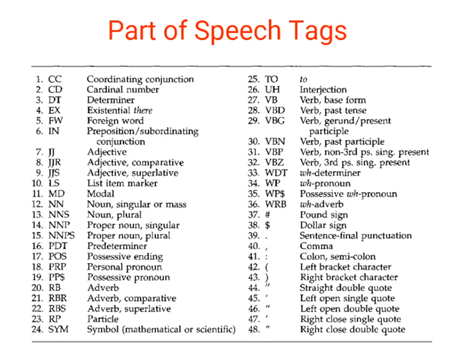

I've decided to start anew with a tokenizer that can handle punctuation, including contractions, better.

In [16]:
good_titles = pd.read_csv('../data/clean_titles.csv')

In [17]:
twd = nltk.tokenize.TreebankWordTokenizer()

good_titles['title_tokenized'] = good_titles['Title'].apply(lambda x: twd.tokenize(x))
good_titles.head()

,uniq_id,Play,Occurences,Title,title_tokenized
0,0,alls well that ends well,3,all's well that ends well,"[all, 's, well, that, ends, well]"
1,3,alls well that ends well,4,all's well,"[all, 's, well]"
2,6,alls well that ends well,5,the devil drives,"[the, devil, drives]"
3,8,alls well that ends well,1,edge of hazard,"[edge, of, hazard]"
4,13,alls well that ends well,3,a mingled yarn,"[a, mingled, yarn]"


In [18]:
good_titles['title_pos'] = good_titles['title_tokenized'].apply(lambda x: nltk.pos_tag(x))
good_titles['pos_tag'] = good_titles['title_pos'].apply(lambda x: [i[1] for i in x])

good_titles.head()

,uniq_id,Play,Occurences,Title,title_tokenized,title_pos,pos_tag
0,0,alls well that ends well,3,all's well that ends well,"[all, 's, well, that, ends, well]","[(all, DT), ('s, POS), (well, NN), (that, IN), (ends, VBZ), (well, RB)]","[DT, POS, NN, IN, VBZ, RB]"
1,3,alls well that ends well,4,all's well,"[all, 's, well]","[(all, DT), ('s, POS), (well, NN)]","[DT, POS, NN]"
2,6,alls well that ends well,5,the devil drives,"[the, devil, drives]","[(the, DT), (devil, NN), (drives, NNS)]","[DT, NN, NNS]"
3,8,alls well that ends well,1,edge of hazard,"[edge, of, hazard]","[(edge, NN), (of, IN), (hazard, NN)]","[NN, IN, NN]"
4,13,alls well that ends well,3,a mingled yarn,"[a, mingled, yarn]","[(a, DT), (mingled, VBN), (yarn, NN)]","[DT, VBN, NN]"


Now that punctuation is tokenized, the title lengths have changed in some cases. Will need to compare tokenized title lengths to the shakespearean tokenized corpus.

In [20]:
length_count = []

for title in good_titles['Title']:
    length = len(title.split())
    length_count.append(length)
    
good_titles['actual_title_len'] = length_count

In [21]:
token_count = []

for title in good_titles['title_tokenized']:
    token_count.append(len(title))
    
good_titles['tokenized_len'] = token_count

good_titles.head()

,uniq_id,Play,Occurences,Title,title_tokenized,title_pos,pos_tag,actual_title_len,tokenized_len
0,0,alls well that ends well,3,all's well that ends well,"[all, 's, well, that, ends, well]","[(all, DT), ('s, POS), (well, NN), (that, IN), (ends, VBZ), (well, RB)]","[DT, POS, NN, IN, VBZ, RB]",5,6
1,3,alls well that ends well,4,all's well,"[all, 's, well]","[(all, DT), ('s, POS), (well, NN)]","[DT, POS, NN]",2,3
2,6,alls well that ends well,5,the devil drives,"[the, devil, drives]","[(the, DT), (devil, NN), (drives, NNS)]","[DT, NN, NNS]",3,3
3,8,alls well that ends well,1,edge of hazard,"[edge, of, hazard]","[(edge, NN), (of, IN), (hazard, NN)]","[NN, IN, NN]",3,3
4,13,alls well that ends well,3,a mingled yarn,"[a, mingled, yarn]","[(a, DT), (mingled, VBN), (yarn, NN)]","[DT, VBN, NN]",3,3


In [22]:
good_titles.tokenized_len.value_counts()

3     194
4     170
2     122
5      76
6      27
1      18
7       5
11      2
9       1
8       1
Name: tokenized_len, dtype: int64

In [23]:
good_titles.actual_title_len.value_counts()

3     200
4     166
2     144
5      64
6      19
1      18
8       2
7       2
10      1
Name: actual_title_len, dtype: int64

In [25]:
bigram_titles_df = good_titles[good_titles['tokenized_len']==2]
print('Number of bigrams:', bigram_titles_df.shape[0])
bigram_titles_df.sample(5)

Number of bigrams: 122


,uniq_id,Play,Occurences,Title,title_tokenized,title_pos,pos_tag,actual_title_len,tokenized_len
145,379,macbeth,1,strange intelligence,"[strange, intelligence]","[(strange, JJ), (intelligence, NN)]","[JJ, NN]",2,2
293,711,othello,19,sweet revenge,"[sweet, revenge]","[(sweet, JJ), (revenge, NN)]","[JJ, NN]",2,2
382,1002,twelfth night,14,midsummer madness,"[midsummer, madness]","[(midsummer, NN), (madness, NN)]","[NN, NN]",2,2
333,860,romeo and juliet,1,dear encounter,"[dear, encounter]","[(dear, JJ), (encounter, NN)]","[JJ, NN]",2,2
424,1092,hamlet,1,fair ophelia,"[fair, ophelia]","[(fair, NN), (ophelia, NNS)]","[NN, NNS]",2,2


In [26]:
trigram_titles_df = good_titles[good_titles['tokenized_len']==3]
print('Number of trigrams:', trigram_titles_df.shape[0])
trigram_titles_df.sample(5)

Number of trigrams: 194


,uniq_id,Play,Occurences,Title,title_tokenized,title_pos,pos_tag,actual_title_len,tokenized_len
31,80,as you like it,1,jealous in honour,"[jealous, in, honour]","[(jealous, JJ), (in, IN), (honour, NN)]","[JJ, IN, NN]",3,3
370,983,twelfth night,2,food of love,"[food, of, love]","[(food, NN), (of, IN), (love, NN)]","[NN, IN, NN]",3,3
503,1280,hamlet,1,to take arms,"[to, take, arms]","[(to, TO), (take, VB), (arms, NNS)]","[TO, VB, NNS]",3,3
71,154,henry vi part 1,1,alarum and excursion,"[alarum, and, excursion]","[(alarum, NN), (and, CC), (excursion, NN)]","[NN, CC, NN]",3,3
116,275,king lear,1,tom's a-cold,"[tom, 's, a-cold]","[(tom, NN), ('s, POS), (a-cold, JJ)]","[NN, POS, JJ]",2,3


In [27]:
fourgram_titles_df = good_titles[good_titles['tokenized_len']==4]
print('Number of fourgrams:', fourgram_titles_df.shape[0])
fourgram_titles_df.sample(5)

Number of fourgrams: 170


,uniq_id,Play,Occurences,Title,title_tokenized,title_pos,pos_tag,actual_title_len,tokenized_len
266,642,midsummer nights dream,2,forms of things unknown,"[forms, of, things, unknown]","[(forms, NNS), (of, IN), (things, NNS), (unknown, JJ)]","[NNS, IN, NNS, JJ]",4,4
408,1054,sonnets,1,marriage of true minds,"[marriage, of, true, minds]","[(marriage, NN), (of, IN), (true, JJ), (minds, NNS)]","[NN, IN, JJ, NNS]",4,4
473,1200,hamlet,3,the soul of wit,"[the, soul, of, wit]","[(the, DT), (soul, NN), (of, IN), (wit, NN)]","[DT, NN, IN, NN]",4,4
412,1059,sonnets,2,if this be error,"[if, this, be, error]","[(if, IN), (this, DT), (be, VB), (error, NN)]","[IN, DT, VB, NN]",4,4
600,271,multiple,2,in such a night,"[in, such, a, night]","[(in, IN), (such, PDT), (a, DT), (night, NN)]","[IN, PDT, DT, NN]",4,4


In [28]:
datapath = '../data'

In [30]:
datapath_bigram_titles_df = os.path.join(datapath, 'good_titles_bigrams.csv')
bigram_titles_df.to_csv(datapath_bigram_titles_df, index=False)

In [31]:
datapath_trigram_titles_df = os.path.join(datapath, 'good_titles_trigrams.csv')
trigram_titles_df.to_csv(datapath_trigram_titles_df, index=False)

In [32]:
datapath_fourgram_titles_df = os.path.join(datapath, 'good_titles_fourgrams.csv')
fourgram_titles_df.to_csv(datapath_fourgram_titles_df, index=False)

In [33]:
datapath_good_titles = os.path.join(datapath, 'good_titles_ngrams.csv')
good_titles.to_csv(datapath_good_titles, index=False)